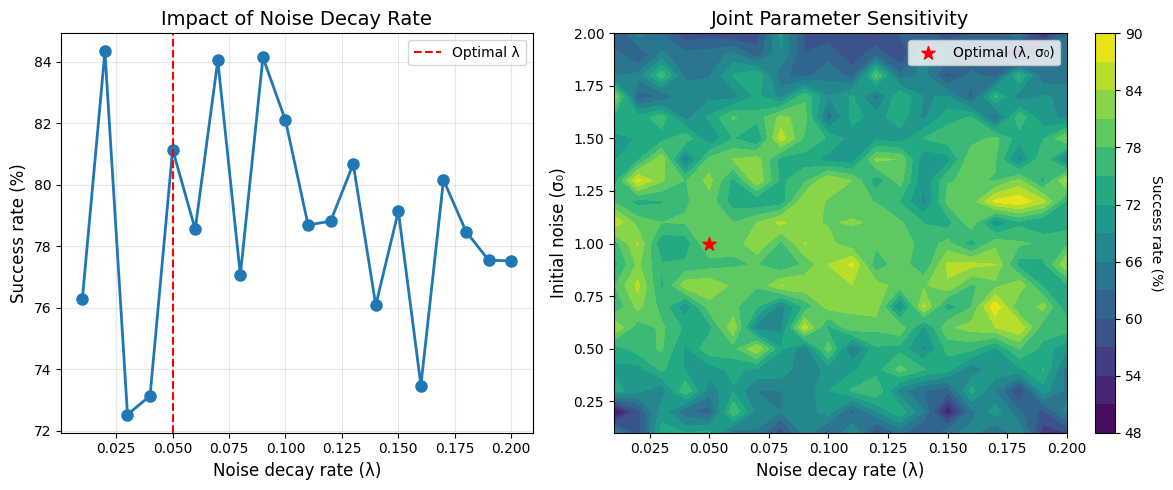

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate synthetic data
lambdas = np.linspace(0.01, 0.2, 20)
sigma0s = np.linspace(0.1, 2.0, 20)
X, Y = np.meshgrid(lambdas, sigma0s)
success_rates = 80 - 100*(X-0.05)**2 - 20*(Y-1.0)**2 + np.random.normal(0, 5, X.shape)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1.2]})

# Plot 1: Success rate vs. λ (fixed σ₀=1.0)
fixed_sigma_idx = np.argmin(np.abs(sigma0s - 1.0))  # Find index where σ₀≈1.0
ax1.plot(lambdas, success_rates[fixed_sigma_idx, :], 'o-', color='#1f77b4', linewidth=2, markersize=8)
ax1.axvline(x=0.05, color='r', linestyle='--', label='Optimal λ')
ax1.set_xlabel('Noise decay rate (λ)', fontsize=12)
ax1.set_ylabel('Success rate (%)', fontsize=12)
ax1.set_title('Impact of Noise Decay Rate', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: 2D Kernel Density for (λ, σ₀)
contour = ax2.contourf(X, Y, success_rates, levels=15, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Success rate (%)', rotation=270, labelpad=15)
ax2.scatter(0.05, 1.0, color='r', s=100, marker='*', label='Optimal (λ, σ₀)')
ax2.set_xlabel('Noise decay rate (λ)', fontsize=12)
ax2.set_ylabel('Initial noise (σ₀)', fontsize=12)
ax2.set_title('Joint Parameter Sensitivity', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

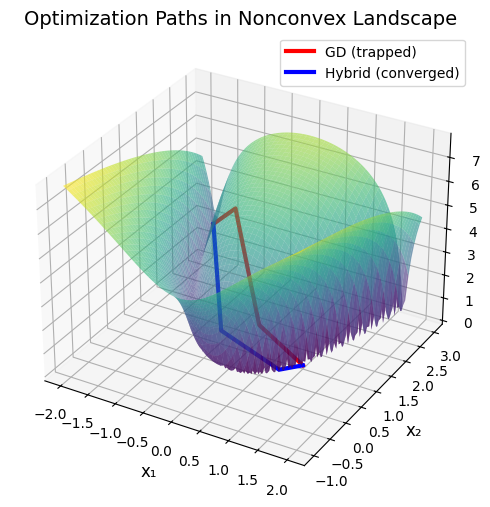

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Generate Rosenbrock function
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2

# Sample trajectories
gd_path = np.array([[-1.5, 2.5], [-0.5, 1.5], [0.5, 0.5], [1.0, 1.0]])  # GD gets stuck
hybrid_path = np.array([[-1.5, 2.5], [0.0, 0.2], [0.8, 0.6], [1.0, 1.0]])  # Hybrid succeeds

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, np.log(Z+1), cmap='viridis', alpha=0.6)
ax.plot(gd_path[:,0], gd_path[:,1], np.log((1-gd_path[:,0])**2 + 100*(gd_path[:,1]-gd_path[:,0]**2)**2 + 1),
        'r-', linewidth=3, label='GD (trapped)')
ax.plot(hybrid_path[:,0], hybrid_path[:,1], np.log((1-hybrid_path[:,0])**2 + 100*(hybrid_path[:,1]-hybrid_path[:,0]**2)**2 + 1),
        'b-', linewidth=3, label='Hybrid (converged)')
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_zlabel('log(f(x))', fontsize=12)
ax.set_title('Optimization Paths in Nonconvex Landscape', fontsize=14)
ax.legend()
plt.savefig('trajectories_3d.pdf', dpi=300)

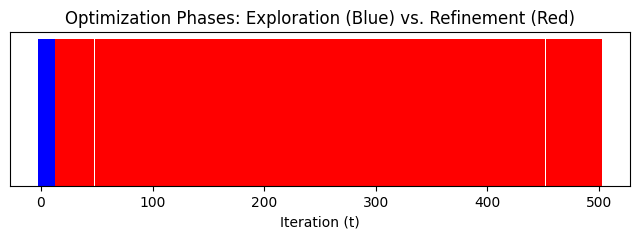

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Use regular variable names (no subscripts)
sigma_0 = 1.0   # σ₀ → sigma_0
lam = 0.05       # λ → lam
t = np.linspace(0, 500, 100)

# Calculate sigma_t values
sigma_t = sigma_0 * np.exp(-lam * t)

# Classify phases
phases = ["Exploration" if s > 0.5 else "Refinement" for s in sigma_t]

# Plot
plt.figure(figsize=(8, 2))
plt.bar(t, [1]*len(t), color=['blue' if p == "Exploration" else 'red' for p in phases], width=5)
plt.xlabel("Iteration (t)")
plt.title("Optimization Phases: Exploration (Blue) vs. Refinement (Red)")
plt.yticks([])
plt.show()


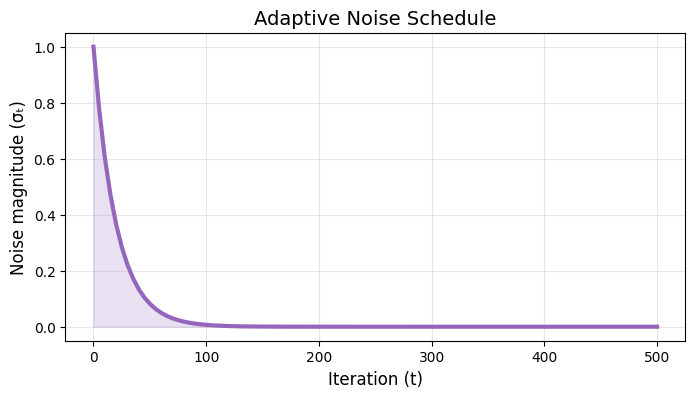

In [13]:
t = np.linspace(0, 500, 100)
sigma_t = 1.0 * np.exp(-0.05 * t)

plt.figure(figsize=(8, 4))
plt.plot(t, sigma_t, linewidth=3, color='#9467bd')
plt.fill_between(t, 0, sigma_t, alpha=0.2, color='#9467bd')
plt.xlabel('Iteration (t)', fontsize=12)
plt.ylabel('Noise magnitude (σₜ)', fontsize=12)
plt.title('Adaptive Noise Schedule', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('noise_schedule.pdf', dpi=300)